# Zadanie 1
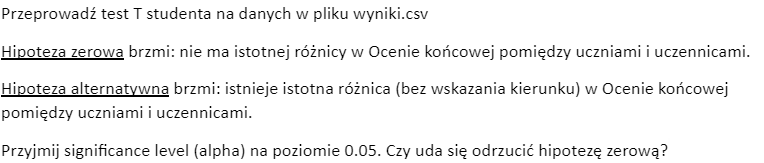

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import statsmodels.api as sm
from scipy.stats import ttest_ind
import plotly.express as px
import seaborn as sb

In [2]:
df = pd.read_csv('/content/drive/MyDrive/PAD/cwiczenie 7?/wyniki.csv')
df

,plec,ocena_koncowa
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10
...,...,...
352,M,9
353,M,16
354,M,7
355,M,10


In [3]:
female = df['plec'] == 'F'
male = df['plec'] == 'M'

In [4]:
df[female]

,plec,ocena_koncowa
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10
...,...,...
343,F,15
344,F,10
349,F,10
350,F,6


In [5]:
ttest = ttest_ind(df[male]['ocena_koncowa'], df[female]['ocena_koncowa'])

In [6]:
ttest

Ttest_indResult(statistic=1.9404771273257526, pvalue=0.053113174845791505)

**Zakładamy poziom istotności na poziomie 0.05, więc p-value jest większa niż zakładany próg istotności, więc nie mam podstaw aby odrzucić hipotezę zerową.**

Próba policzenia t-statystki "ręcznie"

In [ ]:
# std_men = np.std(df[men]['ocena_koncowa'])
# std_female = np.std(df[female]['ocena_koncowa'])
# mean_men = np.mean(df[men]['ocena_koncowa'])
# mean_female = np.mean(df[female]['ocena_koncowa'])
# n_men = df[men].size
# n_female = df[men].size

In [ ]:
# print(n_men)
# print(n_female)

In [ ]:
# t_stats = (mean_men - mean_female) / (np.sqrt((np.square(std_men)/n_men) + (np.square(std_female)/n_female)))
# t_stats

# Zadanie 2

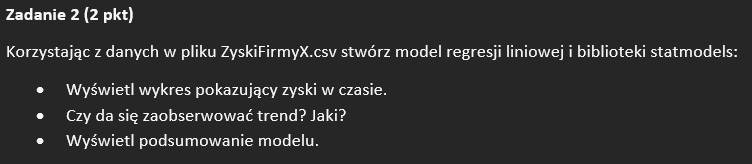

In [17]:
df = pd.read_csv('/content/drive/MyDrive/PAD/cwiczenie 7?/ZyskiFirmyX.csv')

In [18]:
df.head()

,Rok,Zysk
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764


In [20]:
fig = px.line(df, x='Rok', y='Zysk')
fig.update_layout(title="Zysk w każdym roku", xaxis_title="Rok",
    yaxis_title="Zyski (tys.)")
fig.show()

**Wnioski:**
Zyski firmy tylko w trzech latach nie była dodatnia
Jedynym trendem jaki zaobserwowałem na podstawie wykresu jest to, że firma po zanotowaniu straty, w kolejnym roku odrabia straty i jest zawsze na plus (w niektórych latach są to gigantyczne wzrosty np. 1926-1928, 1988-1989)


In [21]:
fig = px.scatter(df, x='Rok', y='Zysk')
fig.update_layout(title="Zysk w każdym roku", xaxis_title="Rok",
    yaxis_title="Zyski (tys.)")
fig.show()

In [11]:
import statsmodels.formula.api as smf
model = smf.ols(formula='Zysk ~ Rok', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Zysk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.09357
Date:                Thu, 26 Jan 2023   Prob (F-statistic):              0.760
Time:                        20:45:55   Log-Likelihood:                -1521.3
No. Observations:                 200   AIC:                             3047.
Df Residuals:                     198   BIC:                             3053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1373.8795   1150.888      1.194      0.2

Zmieniam rok na lata

In [13]:
df['Lata'] = df['Rok'] - 1821

In [15]:
model2 = smf.ols(formula='Zysk ~ Lata', data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Zysk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.09357
Date:                Thu, 26 Jan 2023   Prob (F-statistic):              0.760
Time:                        20:46:45   Log-Likelihood:                -1521.3
No. Observations:                 200   AIC:                             3047.
Df Residuals:                     198   BIC:                             3053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1040.2212     68.906     15.096      0.0

In [22]:
import plotly.graph_objects as go

df["fitted"] = model.fittedvalues

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df["Rok"], y=df["Zysk"], name="Zyski w każdym roku", mode="markers"))
fig.add_trace(go.Scatter(
    x=df["Rok"], y=df["fitted"], name="Dopasowana prosta"))
fig.update_layout(title="Dopasowana prosta i zyski w każdym roku", xaxis_title="Rok",
    yaxis_title="Zyski")
fig.show()

Po wizualizacji oraz na podstawie bardzo dużych wartości p-value dla wspolczynników widać, ze w danych nie jest obserwowany żaden trend liniowy.

# Zadanie 3

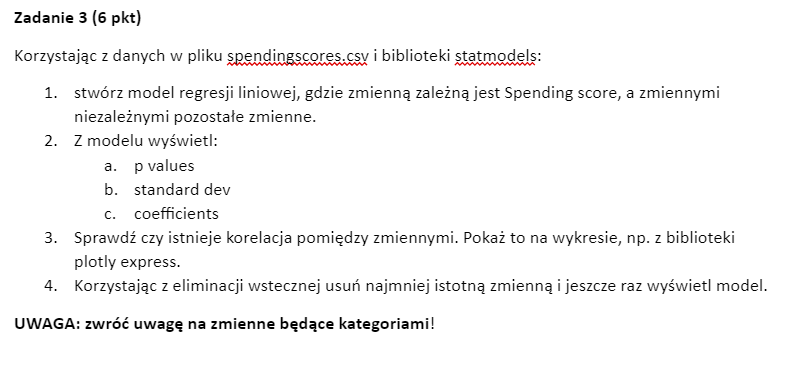

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PAD/cwiczenie 7?/spendingscores.csv')

In [ ]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
values_update = {'Gender':{'Male':1, 'Female':0}}

In [ ]:
df = df.replace(values_update)

In [ ]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols(formula='SpendingScore ~ Gender + Age + AnnualIncome', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           4.91e-05
Time:                        15:53:41   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       73.9300      6.642     11.130   

In [ ]:
print("Model P Values:", model.pvalues.values)
print("Model Std Errs:", model.bse.values)
print("Model Coef:", model.params.values)


Model P Values: [1.28775203e-22 5.67117187e-01 3.05517724e-06 9.05093933e-01]
Model Std Errs: [6.64225287 3.51182541 0.12491583 0.06641961]
Model Coef: [ 7.39300336e+01 -2.01323375e+00 -6.00371040e-01  7.92939510e-03]


                 Gender       Age  AnnualIncome  SpendingScore
Gender         1.000000  0.060867      0.056410      -0.058109
Age            0.060867  1.000000     -0.012398      -0.327227
AnnualIncome   0.056410 -0.012398      1.000000       0.009903
SpendingScore -0.058109 -0.327227      0.009903       1.000000


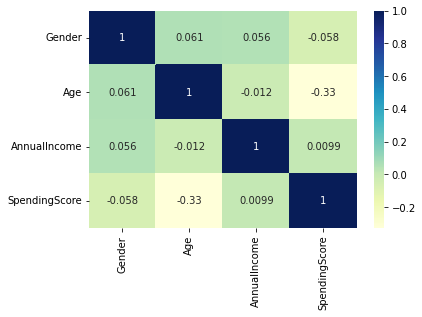

In [ ]:
corr = df.corr()
print(corr)
plot = sb.heatmap(df.corr(), cmap='YlGnBu', annot=True)


Usuwam zmienną AnnualIncome, ponieważ jego p-value jest największe, jak i ma najniższy współczynnik Coef

In [ ]:
model1 = smf.ols(formula='SpendingScore ~ Gender + Age', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     11.99
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.22e-05
Time:                        15:56:28   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1850.
Df Residuals:                     197   BIC:                             1860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.4089      5.281     14.089      0.0

In [ ]:
print("Model P Values:", model1.pvalues.values)
print("Model Std Errs:", model1.bse.values)
print("Model Coef:", model1.params.values)

Model P Values: [1.22119569e-31 5.70145667e-01 2.85282740e-06]
Model Std Errs: [5.28123206 3.49727772 0.12458719]
Model Coef: [74.40887608 -1.989221   -0.60060795]
